# <font color='blue'>Analisys COVID19 - Relation between confirmed cases and weather conditions</font>

In [1]:
#Pyhton library

import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import numpy as np
import statsmodels.api as sm
from pathlib import Path
import plotly.offline as py
import plotly.express as px
import cufflinks as cf
import datetime

## Data analysis for Milan

In [16]:
#Loading datasets (Weather and Italy Covid19)
df_italy = pd.read_csv('covid19-in-italy/covid19_italy_province.csv')
weather_milan = pd.read_csv('Weather/data_milan_italy_weather.csv')

#Creating dataset with Milan data
df_milan = df_italy[df_italy.ProvinceName=='Milano']

#Converting column Date
df_milan['Date'] = pd.to_datetime(df_milan['Date'])
df_milan['Date'] = df_milan['Date'].dt.strftime('%m-%d-%Y')

weather_milan['Time'] = pd.to_datetime(weather_milan['Time'])
weather_milan['Time'] = weather_milan['Time'].dt.strftime('%m-%d-%Y')
weather_milan1 = weather_milan[23:-2]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_milan['Date'], df_milan['TotalPositiveCases'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

#ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('Cases in Milan')
plt.xlabel("Date")
plt.ylabel("Total Positive Cases")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_milan['Time'], weather_milan['Temperature'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

#ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('Temperature in Milan')
plt.xlabel("Date")
plt.ylabel("Temperature")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_milan['Time'], weather_milan['Humidity'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

#ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('Humidity in Milan')
plt.xlabel("Date")
plt.ylabel("Humidity")

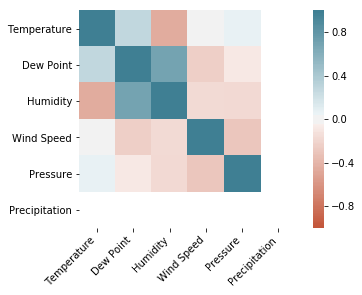

In [17]:
corr = weather_milan.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

### Analysis: Humidity and Cases

In [ ]:
plt.scatter(df_milan['TotalPositiveCases'], weather_milan1['Humidity'])

#ax.set_title('Humidity in Milan')
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")

### Analysis: Temperature x Confirmed Cases

In [ ]:
plt.scatter(df_milan['TotalPositiveCases'], weather_milan1['Temperature'])

#ax.set_title('Humidity in Milan')
plt.xlabel("Total Positive Cases")
plt.ylabel("Temperature")

In [ ]:
df_new_york1.tail()

In [30]:
df_new_york1.tail()

,Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2697,14-04-2020,New York,1737,16617,4068,40517
2759,15-04-2020,New York,474,17091,1533,42050
2821,16-04-2020,New York,399,17490,1476,43526
2883,17-04-2020,New York,442,17932,1585,45111
2945,18-04-2020,New York,288,18220,1093,46204


## Data analysis for New York

In [50]:
df_new_york = pd.read_csv('Weather/data_new-york_weather.csv')
df_new_york.head()

,Date,Temp Max,Temp Avg,Temp Min,Hum Max,Hum Avg,Hum Min,Cases,DP Max,DP Avg,DP Min,Wind Max,Wind Avg,Wind Min,Press Max,Press Avg,Press Min,Precipitation (in)
0,01-02-20,41,38.6,37,93,87.0,79,0,37,34.9,33,8,4.8,0,30.1,29.9,29.6,0.01
1,02-02-20,43,38.1,35,87,75.9,47,0,34,30.9,24,15,8.7,3,29.6,29.6,29.5,0.02
2,03-02-20,56,46.4,37,89,62.1,39,0,36,33.1,31,14,8.2,0,29.9,29.8,29.5,0.05
3,04-02-20,58,47.8,40,86,76.7,62,0,48,40.5,35,13,5.4,0,29.8,29.8,29.7,0.00
4,05-02-20,47,40.8,39,82,60.0,37,0,41,27.1,17,17,10.5,6,30.1,30.0,29.8,0.01


In [53]:
df_new_york1 = df_new_york.drop(df_new_york['Cases'].idxmax())
df_new_york2 = df_new_york1[df_new_york1['Cases'] != 0]
df_new_york2.head()

,Date,Temp Max,Temp Avg,Temp Min,Hum Max,Hum Avg,Hum Min,Cases,DP Max,DP Avg,DP Min,Wind Max,Wind Avg,Wind Min,Press Max,Press Avg,Press Min,Precipitation (in)
32,04-03-20,57,50.5,46,66,44.8,24,1,37,28.5,19,28,18.2,12,29.9,29.7,29.5,0.28
33,05-03-20,52,44.8,40,71,48.5,27,1,34,25.4,19,24,12.9,5,30.1,30.1,29.9,0.00
34,06-03-20,45,41.6,37,89,74.7,65,3,36,34.0,30,20,13.0,5,30.1,29.9,29.8,0.00
37,09-03-20,72,59.6,47,41,26.1,15,7,32,23.4,17,17,11.1,6,30.4,30.3,30.2,0.00
38,10-03-20,66,60.8,55,64,48.0,35,12,49,40.6,30,22,13.2,6,30.2,30.0,29.9,0.00


Text(0,0.5,'Total Positive Cases')

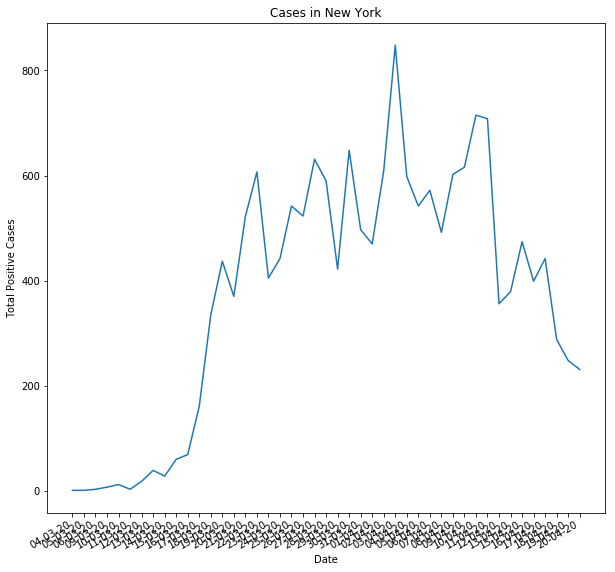

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_new_york2['Date'], df_new_york2['Cases'])
fig.autofmt_xdate()
ax.set_title('Cases in New York')
plt.xlabel("Date")
plt.ylabel("Total Positive Cases")

Text(66.375,0.5,'Temperature')

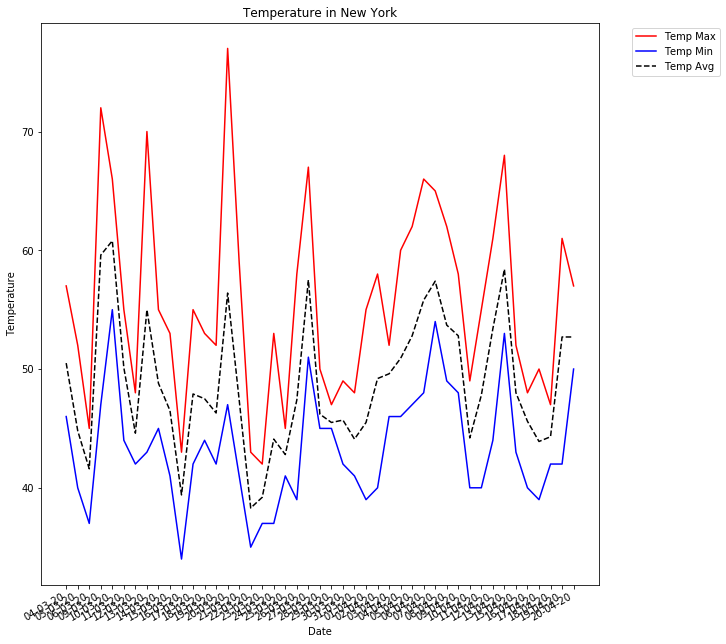

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_new_york2['Date'], df_new_york2['Temp Max'], 'r', label='Temp Max')
ax.plot(df_new_york2['Date'], df_new_york2['Temp Min'], 'b', label='Temp Min')
ax.plot(df_new_york2['Date'], df_new_york2['Temp Avg'], 'k--', label='Temp Avg')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

fig.autofmt_xdate()
ax.set_title('Temperature in New York')
plt.xlabel("Date")
plt.ylabel("Temperature")

Text(60.125,0.5,'Humidity')

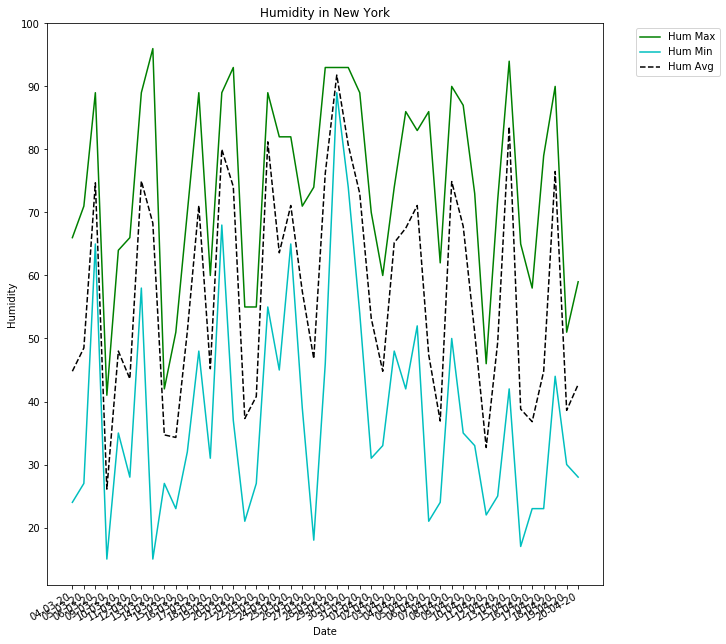

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_new_york2['Date'], df_new_york2['Hum Max'], 'g', label='Hum Max')
ax.plot(df_new_york2['Date'], df_new_york2['Hum Min'], 'c', label='Hum Min')
ax.plot(df_new_york2['Date'], df_new_york2['Hum Avg'], 'k--', label='Hum Avg')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

fig.autofmt_xdate()
ax.set_title('Humidity in New York')
plt.xlabel("Date")
plt.ylabel("Humidity")

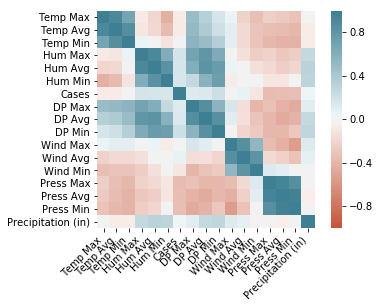

In [58]:
corr = df_new_york2.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

Text(0,0.5,'Humidity')

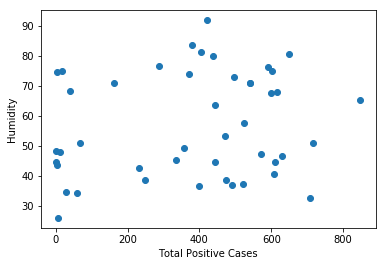

In [59]:
plt.scatter(df_new_york2['Cases'], df_new_york2['Hum Avg'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")

Text(0,0.5,'Temperature')

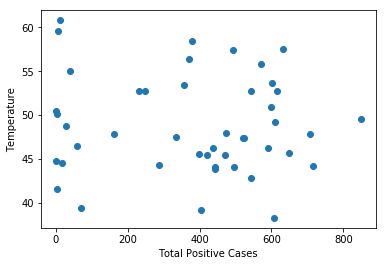

In [60]:
plt.scatter(df_new_york2['Cases'], df_new_york2['Temp Avg'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Temperature")

## Data analysis for Sao Paulo

In [ ]:
df_SP = pd.read_csv('brazil_covid19.csv')
weather_SP = pd.read_csv('Weather/data_Sao-Paulo-Brazil_weather.csv')

#Creating dataset with Milan data
df_SP = df_SP[df_SP.state=='São Paulo']

#Converting column Date
df_SP['date'] = pd.to_datetime(df_SP['date'])
df_SP['date'] = df_SP['date'].dt.strftime('%d-%m-%Y')
df_SP1 = df_SP[2:]

weather_SP['Time'] = pd.to_datetime(weather_SP['Time'])
weather_SP['Time'] = weather_SP['Time'].dt.strftime('%m-%d-%Y')
weather_SP1 = weather_SP[:-1]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_SP1['date'], df_SP1['cases'])
fig.autofmt_xdate()
ax.set_title('Cases in São Paulo')
plt.xlabel("Date")
plt.ylabel("Total Positive Cases")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_SP1['Time'], weather_SP1['Temperature'])
fig.autofmt_xdate()
ax.set_title('Temperature in São Paulo')
plt.xlabel("Date")
plt.ylabel("Temperature")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_SP1['Time'], weather_SP1['Humidity'])
fig.autofmt_xdate()
ax.set_title('Humidity in São Paulo')
plt.xlabel("Date")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_SP1['cases'], weather_SP1['Humidity'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_SP1['cases'], weather_SP1['Temperature'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Temperature")

## Data analysis for Barcelona

In [ ]:
df_BCN = pd.read_csv('covid19spain/COVID_19_SPAIN_OFFICIAL_DATA.csv')
weather_BCN = pd.read_csv('Weather/data_Barcelona-Spain_weather.csv')

#Creating dataset with BCN data
df_BCN = df_BCN[df_BCN.CCAA=='Cataluña']

#Converting column Date
df_BCN['DATE'] = pd.to_datetime(df_BCN['DATE'])
df_BCN['DATE'] = df_BCN['DATE'].dt.strftime('%m-%d-%Y')

weather_BCN['Time'] = pd.to_datetime(weather_BCN['Time'])
weather_BCN['Time'] = weather_BCN['Time'].dt.strftime('%m-%d-%Y')
weather_BCN1 = weather_SP[19:-4]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_BCN['DATE'], df_BCN['TOTAL_INFECTED'])
fig.autofmt_xdate()
ax.set_title('Cases in BCN')
plt.xlabel("Date")
plt.ylabel("Total Positive Cases")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_BCN1['Time'], weather_BCN1['Temperature'])
fig.autofmt_xdate()
ax.set_title('Temperature in BCN')
plt.xlabel("Date")
plt.ylabel("Temperature")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_BCN1['Time'], weather_BCN1['Humidity'])
fig.autofmt_xdate()
ax.set_title('Humidity in BCN')
plt.xlabel("Date")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_BCN['TOTAL_INFECTED'], weather_BCN1['Humidity'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_BCN['TOTAL_INFECTED'], weather_BCN1['Temperature'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Temperature")

## Data analysis for New Delhi

In [ ]:
df_New_Delhi = pd.read_csv('covid19-in-india/covid_19_india.csv')
weather_New_Delhi = pd.read_csv('Weather/data_New-Delhi-india_weather.csv')

#Creating dataset with New Delhi data
df_New_Delhi = df_New_Delhi[df_New_Delhi.State=='Delhi']

#Converting column Date
df_New_Delhi['Date'] = pd.to_datetime(df_New_Delhi['Date'])
df_New_Delhi['Date'] = df_New_Delhi['Date'].dt.strftime('%m-%d-%Y')

weather_New_Delhi['Time'] = pd.to_datetime(weather_New_Delhi['Time'])
weather_New_Delhi['Time'] = weather_New_Delhi['Time'].dt.strftime('%m-%d-%Y')
weather_New_Delhi1 = weather_New_Delhi[30:-2]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_New_Delhi['Date'], df_New_Delhi['Confirmed'])
fig.autofmt_xdate()
ax.set_title('Cases in New Delhi')
plt.xlabel("Date")
plt.ylabel("Total Positive Cases")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_New_Delhi1['Time'], weather_New_Delhi1['Temperature'])
fig.autofmt_xdate()
ax.set_title('Temperature in New Delhi')
plt.xlabel("Date")
plt.ylabel("Temperature")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weather_New_Delhi1['Time'], weather_New_Delhi1['Humidity'])
fig.autofmt_xdate()
ax.set_title('Humidity in New Delhi')
plt.xlabel("Date")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_New_Delhi['Confirmed'], weather_New_Delhi1['Humidity'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")

In [ ]:
plt.scatter(df_New_Delhi['Confirmed'], weather_New_Delhi1['Temperature'])
plt.xlabel("Total Positive Cases")
plt.ylabel("Temperature")